# Give me some credit (test)
* Máster en Data Science y Finanzas, CUNEF
* Subject: Machine learning
* Authors: Raquel Fort, Lucía Saiz, María Carrasco
* Contact: raquel.fort@cunef.edu, l.saiz@cunef.edu, m.carrascomelendez@cunef.edu

## Table of contents:

1.  Loading dataset and EDA.
    - Histograms 
    - Correlation matrix
2.  Categorical and numerical datasets
    - Treatment numerical dataset.
    - Treatment categorical dataset: Dummies.
3.  Lasso Model (Variable Importance)
4.  Support Vector Machine (SVM)
5.  Logistic Regression
6.  Random Forest
7.  XGBOOST
8.  ROC Curves. Comparisons.
9.  Conclusions
10.  References

## 1. Loading dataset and EDA

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from matplotlib import pyplot
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import r2_score # R^2
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from math import sqrt # sqrt
import random
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb # XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
%matplotlib inline

In [190]:
data_path = './data/test_set.csv'

In [191]:
data_orig = pd.read_csv(data_path, low_memory = False) 

In [192]:
data_orig['default'] = data_orig['target']

In [193]:
data = data_orig.loc[:, ['default', 'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
                         'application_type','delinq_2yrs','delinq_amnt','desc','dti','emp_length','funded_amnt','grade',
                         'home_ownership','initial_list_status','installment','int_rate','last_pymnt_amnt','loan_amnt',
                         'mo_sin_rcnt_tl','mths_since_last_delinq','num_accts_ever_120_pd','num_il_tl','num_sats',
                         'num_tl_120dpd_2m','out_prncp','pub_rec_bankruptcies','recoveries','term','title','tot_coll_amt',
                         'tot_cur_bal','total_acc','total_pymnt','debt_settlement_flag']]

The EDA helps us organize the information that "data" gives us in order to detect certain patterns of behavior as well as important values to the underlying model.
Exploring the data must be the first step of any type of data analysis.

Up next, we can see a small preview of the database with the first 5 rows and 36 columns.

In [194]:
data.head()

,default,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,application_type,delinq_2yrs,delinq_amnt,desc,...,out_prncp,pub_rec_bankruptcies,recoveries,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,debt_settlement_flag
0,0,0.0,0.0,NJ,59.0,120000.0,Individual,0.0,0.0,NaN,...,0.0,0.0,0.00,36 months,Credit card refinancing,0.0,30213.0,14.0,21931.187758,N
1,0,0.0,3.0,TX,45.0,35000.0,Individual,0.0,0.0,NaN,...,0.0,0.0,0.00,36 months,Credit card refinancing,363.0,26405.0,19.0,2895.089683,N
2,1,0.0,4.0,IN,76.0,119000.0,Individual,0.0,0.0,NaN,...,0.0,0.0,1574.23,36 months,Debt consolidation,92.0,64210.0,38.0,11962.200000,N
3,0,0.0,7.0,AZ,NaN,82000.0,Individual,0.0,0.0,NaN,...,0.0,0.0,0.00,36 months,Credit card refinancing,0.0,133179.0,27.0,10058.300000,N
4,1,0.0,4.0,TX,NaN,66287.0,Individual,0.0,0.0,NaN,...,0.0,1.0,956.61,36 months,Debt consolidation,148.0,26410.0,16.0,11994.890000,N


We use the function info() to generate general information about the data frame. The data types of our variables range from int32, int64, float64 and object. Here is where we can clearly differentiate our categorical and numerical variables.

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 36 columns):
default                   332020 non-null int64
acc_now_delinq            332016 non-null float64
acc_open_past_24mths      319615 non-null float64
addr_state                332020 non-null object
all_util                  130089 non-null float64
annual_inc                332020 non-null float64
application_type          332020 non-null object
delinq_2yrs               332016 non-null float64
delinq_amnt               332016 non-null float64
desc                      31445 non-null object
dti                       331934 non-null float64
emp_length                312662 non-null object
funded_amnt               332020 non-null int64
grade                     332020 non-null object
home_ownership            332020 non-null object
initial_list_status       332020 non-null object
installment               332020 non-null float64
int_rate                  332020 non-null float64
l

The described method shows the basic statistical characteristics of each numerical variable: the number of observations of each variable, mean, standard deviation, minimum and maximum values, mediana and quartiles 0.25 and 0.75.

In [196]:
data.describe()

,default,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,...,num_il_tl,num_sats,num_tl_120dpd_2m,out_prncp,pub_rec_bankruptcies,recoveries,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt
count,332020.000000,332016.000000,319615.000000,130089.000000,3.320200e+05,332016.000000,332016.000000,331934.000000,332020.000000,332020.000000,...,314544.000000,317414.000000,302265.000000,332020.000000,331674.000000,332020.000000,3.145440e+05,3.145440e+05,332016.000000,332020.000000
mean,0.215698,0.004858,4.704463,58.273190,7.593191e+04,0.316997,14.810066,18.289033,14429.829830,438.313558,...,8.564678,11.634392,0.000801,217.124184,0.134138,230.334655,2.566787e+02,1.405774e+05,24.972682,14657.949376
std,0.411306,0.078676,3.188625,20.939497,6.247035e+04,0.883355,749.912831,11.682787,8709.248061,261.219744,...,7.387388,5.478129,0.030964,1947.344141,0.377575,932.722425,1.135791e+04,1.559375e+05,12.000979,10300.599688
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,500.000000,15.690000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,0.000000,0.000000,2.000000,44.000000,4.560000e+04,0.000000,0.000000,11.800000,8000.000000,249.300000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.947300e+04,16.000000,6723.355078
50%,0.000000,0.000000,4.000000,60.000000,6.500000e+04,0.000000,0.000000,17.610000,12000.000000,375.430000,...,7.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,7.983500e+04,23.000000,12003.324015
75%,0.000000,0.000000,6.000000,73.000000,9.000000e+04,0.000000,0.000000,24.040000,20000.000000,579.960000,...,11.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.098070e+05,32.000000,20348.306895
max,1.000000,14.000000,64.000000,198.000000,9.000000e+06,29.000000,97619.000000,999.000000,40000.000000,1719.830000,...,110.000000,81.000000,6.000000,40000.000000,8.000000,39444.370000,6.214661e+06,4.447397e+06,127.000000,63296.877868


With the function is.na() we can easily see if there are missing values to help us decide how to treat them.

In [197]:
data.isna().sum()

default                        0
acc_now_delinq                 4
acc_open_past_24mths       12405
addr_state                     0
all_util                  201931
annual_inc                     0
application_type               0
delinq_2yrs                    4
delinq_amnt                    4
desc                      300575
dti                           86
emp_length                 19358
funded_amnt                    0
grade                          0
home_ownership                 0
initial_list_status            0
installment                    0
int_rate                       0
last_pymnt_amnt                0
loan_amnt                      0
mo_sin_rcnt_tl             17476
mths_since_last_delinq    167768
num_accts_ever_120_pd      17476
num_il_tl                  17476
num_sats                   14606
num_tl_120dpd_2m           29755
out_prncp                      0
pub_rec_bankruptcies         346
recoveries                     0
term                           0
title     

Columns of the dataset. 

In [198]:
data.columns

Index(['default', 'acc_now_delinq', 'acc_open_past_24mths', 'addr_state',
       'all_util', 'annual_inc', 'application_type', 'delinq_2yrs',
       'delinq_amnt', 'desc', 'dti', 'emp_length', 'funded_amnt', 'grade',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'last_pymnt_amnt', 'loan_amnt', 'mo_sin_rcnt_tl',
       'mths_since_last_delinq', 'num_accts_ever_120_pd', 'num_il_tl',
       'num_sats', 'num_tl_120dpd_2m', 'out_prncp', 'pub_rec_bankruptcies',
       'recoveries', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal',
       'total_acc', 'total_pymnt', 'debt_settlement_flag'],
      dtype='object')

### 1.1. Histograms

We start our viisual analysis of our variables by creating histograms for each of them. In the following, we can already see, for example, that a lot of our variables have pretty significant outliers. This is something that we will need to take into account later on when we treat our data. Some of our variables have better distribution than others, which are the ones that will probably have a smaller number of outliers. 

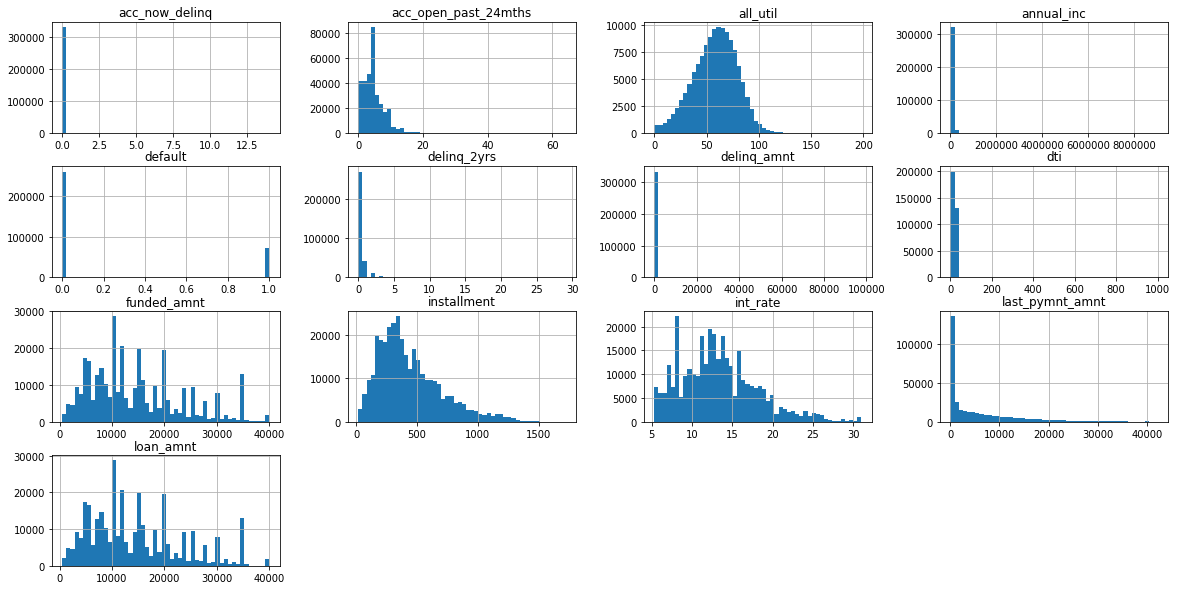

In [199]:
data.iloc[:,0:20].hist(bins = 50, figsize=(20,10))
plt.show()

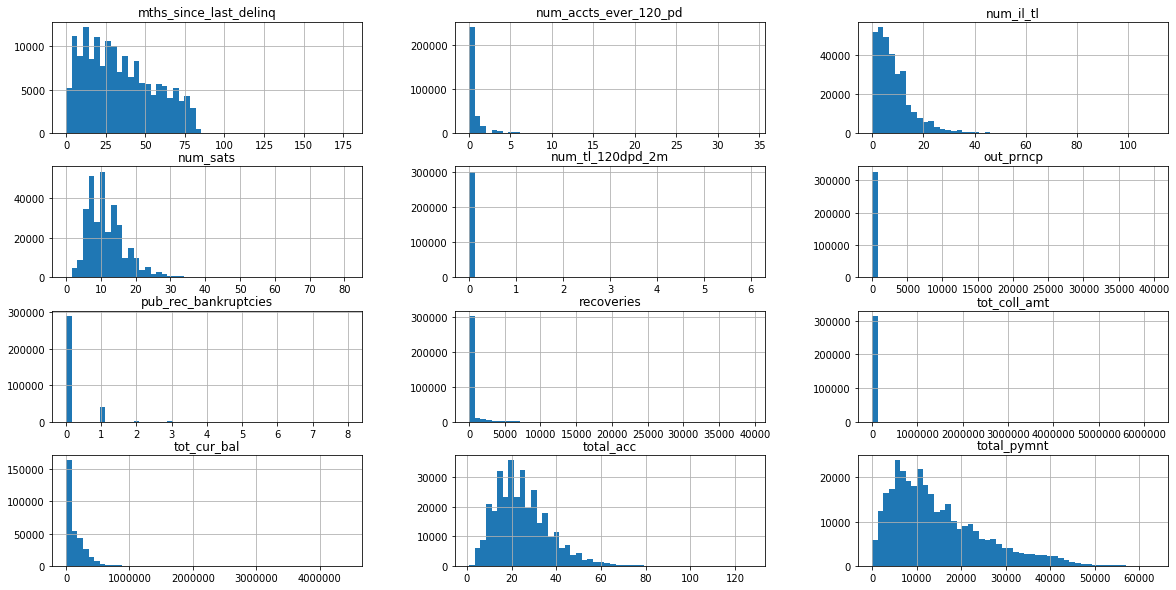

In [200]:
data.iloc[:,21:].hist(bins = 50, figsize=(20,10))
plt.show()

### 1.2. Correlation graph

Finally, we create the correlation graph. This graph indicates how related the variables are, from warmer to colder colors. The red ones indicate the highest correlations and vice versa.
This method has proved to be decisive in the choice of variables, allowing us to eliminate redundant variables in our study. The variables that are very correlated can, by definition, explain one another very well, and therefor, there is no need to use both of them in the study. 

In [201]:
corr = data.corr()

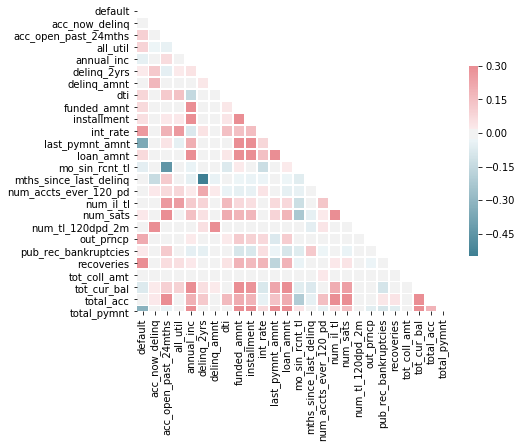

In [202]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2. Categorical and numerical datasets

To facilitate the treatment of our variables, we decide to split our data into two dataframes: one for the treatment of numerical variables (loans_num) and a different one for the treatment of the categorical ones (loans_cat).

In [203]:
loans_num = data.select_dtypes(include = [np.number])
loans_cat = data.select_dtypes(include = [np.object])

Preview of both datasets.

In [204]:
loans_num.head()

,default,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,...,num_il_tl,num_sats,num_tl_120dpd_2m,out_prncp,pub_rec_bankruptcies,recoveries,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt
0,0,0.0,0.0,59.0,120000.0,0.0,0.0,10.89,20000,640.57,...,2.0,9.0,0.0,0.0,0.0,0.00,0.0,30213.0,14.0,21931.187758
1,0,0.0,3.0,45.0,35000.0,0.0,0.0,17.35,2500,82.41,...,16.0,5.0,0.0,0.0,0.0,0.00,363.0,26405.0,19.0,2895.089683
2,1,0.0,4.0,76.0,119000.0,0.0,0.0,16.87,17825,644.33,...,25.0,15.0,0.0,0.0,0.0,1574.23,92.0,64210.0,38.0,11962.200000
3,0,0.0,7.0,NaN,82000.0,0.0,0.0,24.69,9500,298.49,...,12.0,15.0,0.0,0.0,0.0,0.00,0.0,133179.0,27.0,10058.300000
4,1,0.0,4.0,NaN,66287.0,0.0,0.0,13.65,15000,501.74,...,2.0,11.0,0.0,0.0,1.0,956.61,148.0,26410.0,16.0,11994.890000


In [205]:
loans_cat.head()

,addr_state,application_type,desc,emp_length,grade,home_ownership,initial_list_status,term,title,debt_settlement_flag
0,NJ,Individual,NaN,3 years,B,RENT,w,36 months,Credit card refinancing,N
1,TX,Individual,NaN,6 years,B,RENT,w,36 months,Credit card refinancing,N
2,IN,Individual,NaN,3 years,D,RENT,f,36 months,Debt consolidation,N
3,AZ,Individual,NaN,7 years,B,MORTGAGE,w,36 months,Credit card refinancing,N
4,TX,Individual,NaN,10+ years,B,RENT,f,36 months,Debt consolidation,N


### 2.1. Treatment of the numerical dataset

Regarding the numerical variables, we have to deal with the missing data in different ways:

1. Replacing some NaN by random values within a range that we chose by analizing the values in each variable. We decided to do this with certain variables, because they had too high a number of NaNs to consider deleting them all. The variables chosen include:

    - num_accts_ever_120_pd
    - num_il_tl
    - num_sats
    - num_tl_120dpd_2m
    - tot_coll_amt
    - tot_cur_bal
    
    
2. Converting the variables into categorical in the cases where we wanted to keep the missing values as an important information. This happens only with two of our variables, where we considered that the lack of information had a relevant relation to whether the borrower would pay pack their loan or not. These are:

    -  all_util
    - delinq_amnt
    
    
3. Replace other NaN values by the mean of their column or by 0. Similar to the first method, in these cases the number of NaNs in our variables where too high to be deleted, but not relevant enough for us to create a range of random values:

    - annal_inc (mean)
    - mo_sin_rcnt_tl (mean)
    - mths_since_last_delinq (0)


4. Drop the missing values (this step will take place after the treatment of both datasets, numerical and categorical). In these cases, the number of missing values was so low that we decided that it would not have a nig influence on our results if we decided to delete them from our data base:

    - dti
    - acc_open_past_24mths
    - pub_rec_bankruptcies

In [206]:
loans_num.columns

Index(['default', 'acc_now_delinq', 'acc_open_past_24mths', 'all_util',
       'annual_inc', 'delinq_2yrs', 'delinq_amnt', 'dti', 'funded_amnt',
       'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt',
       'mo_sin_rcnt_tl', 'mths_since_last_delinq', 'num_accts_ever_120_pd',
       'num_il_tl', 'num_sats', 'num_tl_120dpd_2m', 'out_prncp',
       'pub_rec_bankruptcies', 'recoveries', 'tot_coll_amt', 'tot_cur_bal',
       'total_acc', 'total_pymnt'],
      dtype='object')

#### Dealing with missing data

1. We replace the Nas values for random values contained in a range; we have considered the most appropiate one for each variable in order to do so by studying their values (with functions and the histograms presented previously).

In [207]:
#First, we fill al NAS by the value -1
loans_num['num_accts_ever_120_pd'].fillna(-1, inplace=True)
loans_num['num_il_tl'].fillna(-1, inplace=True)
loans_num['num_sats'].fillna(-1, inplace=True)
loans_num['num_tl_120dpd_2m'].fillna(-1, inplace=True)
loans_num['tot_coll_amt'].fillna(-1, inplace=True)
loans_num['tot_cur_bal'].fillna(-1, inplace=True)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [208]:
# And then we replace the -1 value by a random one
loans_num['num_accts_ever_120_pd'] =  loans_num['num_accts_ever_120_pd'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['num_il_tl'] =  loans_num['num_il_tl'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['num_sats'] =  loans_num['num_sats'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['num_tl_120dpd_2m'] =  loans_num['num_tl_120dpd_2m'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['tot_coll_amt'] =  loans_num['tot_coll_amt'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['tot_cur_bal'] =  loans_num['tot_cur_bal'].map(lambda v: (random.randint(0,5)) if v == -1 else v)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

2. Convert the variables into categorical on in the cases we wanted to keep the missing values as an important information.

- 'all_util', values greater than 100 = 1, the rest = 0, because we considered that anything that goes beyond a ratio of 1 means that the borrower is more likely to default (owes more than he/she earns):

In [209]:
loans_num[loans_num['all_util'] > 100] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [210]:
loans_num['all_util'] = (loans_num['all_util'] == 1).astype(int)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- 'delinq_amnt', values equal to 0 = 0, the rest = 1, becausue we decided that if the borrower doesn't have any sort of delinquent amount that they owe, they are less likely to commit default on a later loan.

In [211]:
loans_num[loans_num['delinq_amnt'] != 0] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
loans_num['delinq_amnt'] = (loans_num['delinq_amnt'] == 1).astype(int)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
loans_num.delinq_amnt.unique()

array([0, 1], dtype=int64)

3. Replace other NaN values by the mean of their column or by 0.

Mean
- annal_inc
- mo_sin_rcnt_tl

In [214]:
loans_num['annual_inc'].fillna(76163.16, inplace=True)

In [215]:
loans_num['mo_sin_rcnt_tl'].fillna(7.84, inplace=True)

0
- mths_since_last_delinq

In [216]:
loans_num['mths_since_last_delinq'].fillna(0, inplace=True)

The next variables have information related to the progress of the loans that are accepted, so we have to delete them.

In [217]:
del loans_num['last_pymnt_amnt']
del loans_num['total_pymnt']
del loans_num['out_prncp']

#### Scaling the numeric variables:

When scaling the numeric variables, we have to remember that we cannot include the dependent variable "default", so we exclude it from this process and will include it again later on.

In [218]:
scaler = MinMaxScaler()
scaled_loans = scaler.fit_transform(loans_num.iloc[:,1:])
scaled_loans = pd.DataFrame(scaled_loans, columns=['acc_now_delinq', 'acc_open_past_24mths', 'all_util', 'annual_inc',
                                                   'delinq_2yrs','delinq_amnt','dti','funded_amnt','installment','int_rate',
                                                   'loan_amnt','mo_sin_rcnt_tl','mths_since_last_delinq','num_accts_ever_120_pd',
                                                   'num_il_tl','num_sats','num_tl_120dpd_2m','pub_rec_bankruptcies','recoveries',
                                                   'tot_coll_amt','tot_cur_bal','total_acc'])
scaled_loans.head()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,int_rate,...,mths_since_last_delinq,num_accts_ever_120_pd,num_il_tl,num_sats,num_tl_120dpd_2m,pub_rec_bankruptcies,recoveries,tot_coll_amt,tot_cur_bal,total_acc
0,0.0,0.000000,0.0,0.013333,0.0,0.0,0.010901,0.499987,0.372096,0.283094,...,0.000000,0.000000,0.019231,0.111111,0.0,0.000,0.000000,0.000000,0.006793,0.103175
1,0.0,0.046875,0.0,0.003889,0.0,0.0,0.017367,0.062477,0.047364,0.349116,...,0.297753,0.088235,0.153846,0.061728,0.0,0.000,0.000000,0.000058,0.005937,0.142857
2,0.0,0.062500,0.0,0.013222,0.0,0.0,0.016887,0.445611,0.374284,0.566522,...,0.134831,0.029412,0.240385,0.185185,0.0,0.000,0.039910,0.000015,0.014438,0.293651
3,0.0,0.109375,0.0,0.009111,0.0,0.0,0.024715,0.237481,0.173077,0.239413,...,0.207865,0.000000,0.115385,0.185185,0.0,0.000,0.000000,0.000000,0.029945,0.206349
4,0.0,0.062500,0.0,0.007365,0.0,0.0,0.013664,0.374984,0.291326,0.383128,...,0.000000,0.000000,0.019231,0.135802,0.0,0.125,0.024252,0.000024,0.005938,0.119048


### 2.2. Treatment of the categorical dataset: Dummies

#### Dummies

In [219]:
# categoric dummies
loans_cat.columns

Index(['addr_state', 'application_type', 'desc', 'emp_length', 'grade',
       'home_ownership', 'initial_list_status', 'term', 'title',
       'debt_settlement_flag'],
      dtype='object')

### addr_state 

To transform this variable into dummie, since there are a lot of different values, we decide to group them. After analyzing the variable's histogram, we concluded that the best way to divide the values was into four different groups, based on how influential they were to the variable. The division was made as follows.

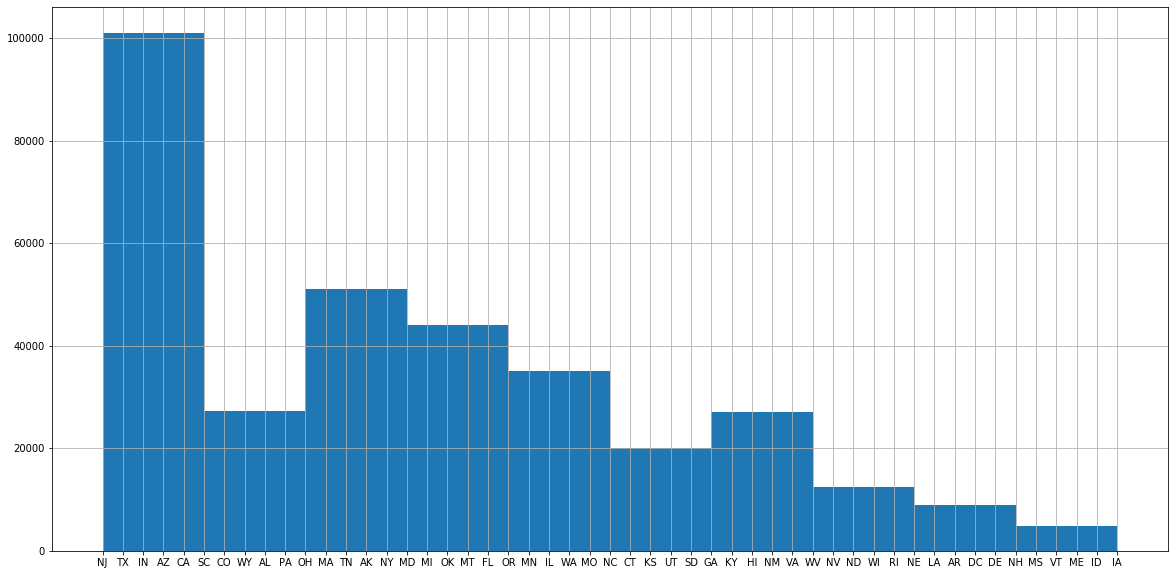

In [220]:
loans_cat.addr_state.hist(figsize = (20,10))

In [221]:
loans_cat.addr_state.unique()

array(['NJ', 'TX', 'IN', 'AZ', 'CA', 'SC', 'CO', 'WY', 'AL', 'PA', 'OH',
       'MA', 'TN', 'AK', 'NY', 'MD', 'MI', 'OK', 'MT', 'FL', 'OR', 'MN',
       'IL', 'WA', 'MO', 'NC', 'CT', 'KS', 'UT', 'SD', 'GA', 'KY', 'HI',
       'NM', 'VA', 'WV', 'NV', 'ND', 'WI', 'RI', 'NE', 'LA', 'AR', 'DC',
       'DE', 'NH', 'MS', 'VT', 'ME', 'ID', 'IA'], dtype=object)

In [222]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'CA') | (loans_cat['addr_state'] == 'OH') | 
                                       (loans_cat['addr_state'] == 'WA') | (loans_cat['addr_state'] == 'TX') | 
                               (loans_cat['addr_state'] == 'MA'), 'first', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'PA') | (loans_cat['addr_state'] == 'MI') | 
                                       (loans_cat['addr_state'] == 'ID') | (loans_cat['addr_state'] == 'AZ') | 
                               (loans_cat['addr_state'] == 'NY'), 'second', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'LA') | (loans_cat['addr_state'] == 'RI') | 
                                       (loans_cat['addr_state'] == 'IL') | (loans_cat['addr_state'] == 'TN') | 
                               (loans_cat['addr_state'] == 'NV') | (loans_cat['addr_state'] == 'MN') | (loans_cat['addr_state'] == 'NM')
                                   | (loans_cat['addr_state'] == 'NJ') | (loans_cat['addr_state'] == 'CO') | (loans_cat['addr_state'] == 'VA') |
                                   (loans_cat['addr_state'] == 'NC') | (loans_cat['addr_state'] == 'FL') | (loans_cat['addr_state'] == 'KY') |
                                   (loans_cat['addr_state'] == 'OK') | (loans_cat['addr_state'] == 'CT') | (loans_cat['addr_state'] == 'MD') |
                                   (loans_cat['addr_state'] == 'NH') | (loans_cat['addr_state'] == 'IN') | (loans_cat['addr_state'] == 'GA') |
                                   (loans_cat['addr_state'] == 'AL'), 'third', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'MT') | (loans_cat['addr_state'] == 'SC') | 
                                       (loans_cat['addr_state'] == 'DC') | (loans_cat['addr_state'] == 'OR') | 
                               (loans_cat['addr_state'] == 'NE') | (loans_cat['addr_state'] == 'KS') | 
                                   (loans_cat['addr_state'] == 'HI') | (loans_cat['addr_state'] == 'AK') | 
                                   (loans_cat['addr_state'] == 'VT') | (loans_cat['addr_state'] == 'MO') |
                                   (loans_cat['addr_state'] == 'UT') | (loans_cat['addr_state'] == 'AR') | 
                                   (loans_cat['addr_state'] == 'MS') | (loans_cat['addr_state'] == 'WI') | 
                                   (loans_cat['addr_state'] == 'ND') | (loans_cat['addr_state'] == 'DE') |
                                   (loans_cat['addr_state'] == 'WV') | (loans_cat['addr_state'] == 'ME') | 
                                   (loans_cat['addr_state'] == 'SD') | (loans_cat['addr_state'] == 'WY') |
                                   (loans_cat['addr_state'] == 'IA'), 'fourth', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [226]:
loans_cat.addr_state.unique()

array(['third', 'first', 'second', 'fourth'], dtype=object)

### emp_length 

To make this variable into dummies but not create too many variables for our models, we decided to treat this variable like the state variable previously, dividing into groups that we classified according to the values that we considered to be more similar. The variables are divided into three groups and are made as follows:

In [227]:
loans_cat['emp_length'].fillna(0, inplace=True)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [228]:
loans_cat.emp_length.unique()

array(['3 years', '6 years', '7 years', '10+ years', '4 years', '9 years',
       '1 year', '8 years', '5 years', '2 years', '< 1 year', 0],
      dtype=object)

In [229]:
#tramificar

In [230]:
loans_cat['emp_length'] = np.where((loans_cat['emp_length'] == '< 1 year') | (loans_cat['emp_length'] == '1 year') | 
                                       (loans_cat['emp_length'] == '2 years') | (loans_cat['emp_length'] == '3 years') | 
                               (loans_cat['emp_length'] == 0), '0-3', loans_cat['emp_length'].values)

loans_cat['emp_length'] = np.where((loans_cat['emp_length'] == '4 years') | (loans_cat['emp_length'] == '5 years') | 
                                       (loans_cat['emp_length'] == '6 years') | (loans_cat['emp_length'] == '7 years') | 
                               (loans_cat['emp_length'] == '8 years') | 
                               (loans_cat['emp_length'] == '9 years'), '4-9', loans_cat['emp_length'].values)

loans_cat['emp_length'] = np.where((loans_cat['emp_length'] == '10+ years'), '10+', loans_cat['emp_length'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [231]:
loans_cat.emp_length.unique()

array(['0-3', '4-9', '10+'], dtype=object)

###  home_ownership

The only this that we decided to treat in this variable before turning it into a dummie variable is to group "ANY", "OTHER" and the missing values into the same category, as we found that these three do not explain anything specific about the borrower; there is no additional information in any of them. 

In [232]:
loans_cat.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

In [233]:
loans_cat.loc[loans_cat['home_ownership'] == 'ANY', 'home_ownership'] = 'OTHER'

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
loans_cat.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

### application_type 

In the case of this variable, as explained earlier, we concluded that the applications that were made with two co-borrowers it is more likely to be paid back on our loan that with only one borrower, so we asign a 1 and a 0 to each unique value.

In [235]:
loans_cat[loans_cat['application_type'] == 'joint app'] = 1
loans_cat[loans_cat['application_type'] == 'inidv'] = 0

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\frame.py:3488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.o

### initial_list_status, term, debt_settlement_flag, grade

These three variables have no missing values, so we can just turn these into dummies directly.

In [236]:
loans_cat.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [237]:
loans_cat.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [238]:
loans_cat.debt_settlement_flag.unique()

array(['N', 'Y'], dtype=object)

In [239]:
loans_cat.grade.unique()

array(['B', 'D', 'C', 'A', 'E', 'G', 'F'], dtype=object)

### title 

The only values that we considered as relevant in this variable were "Debt consolidation" and "Credit card refinancing", as they are the only reaosns out of all offered in the variable which are related to a difficulty in payment or higher chances of delinquency. We decided to fill all the cases where these values were recored with a 1 and the rest with 0. 

In [240]:
loans_cat.title.unique()

array(['Credit card refinancing', 'Debt consolidation',
       'Home improvement', ..., 'Debt gone', 'Arceo Family',
       'Credit Cards Payoff Loan'], dtype=object)

In [241]:
loans_cat['title'].fillna(1, inplace=True)

In [242]:
loans_cat.loc[loans_cat['title'] == 'Debt consolidation', 'title'] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
loans_cat.loc[loans_cat['title'] == 'Credit card refinancing', 'title'] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
loans_cat['title'] = (loans_cat['title'] == 1).astype(int)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
loans_cat.title.unique()

array([1, 0], dtype=int64)

### desc 

As explained in the beginning, we associated the lack of information in this variable to lack of intention from the borrower to let the bank know any additional information on their reasons for taking out a loan. This is a characteristic that could be due to privacy reasons or higher probability of delinquency. Due to this, we decided to fill all the missing values with a 1 and the cases in which information was given with 0. 

In [246]:
loans_cat['desc'].fillna(1, inplace=True)

In [247]:
loans_cat['desc'] = (loans_cat['desc'] == 1).astype(int) 

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [248]:
# check
loans_cat.desc.unique()

array([1, 0], dtype=int64)

After treating all the categorical variables, we decide to check if there are any leftover missing values that we might have missed in the variables before executing the function to turn them into dummies. 

In [249]:
loans_cat.isna().sum()

addr_state              0
application_type        0
desc                    0
emp_length              0
grade                   0
home_ownership          0
initial_list_status     0
term                    0
title                   0
debt_settlement_flag    0
dtype: int64

We delete the next variable because we do not obtain this information until the loan is accepted, and there is no way for us to know this information before deciding to grant these loans. Up next we turn our variables into dummies.

In [250]:
del loans_cat['debt_settlement_flag']

In [251]:
dummies = pd.get_dummies(loans_cat)

In [252]:
dummies.head()

,desc,title,addr_state_first,addr_state_fourth,addr_state_second,addr_state_third,application_type_Individual,application_type_Joint App,emp_length_0-3,emp_length_10+,...,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months
0,1,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,1,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,0


In [253]:
# we check once more to see if there are any missing values in our dummy variables
dummies.isna().sum()

desc                           0
title                          0
addr_state_first               0
addr_state_fourth              0
addr_state_second              0
addr_state_third               0
application_type_Individual    0
application_type_Joint App     0
emp_length_0-3                 0
emp_length_10+                 0
emp_length_4-9                 0
grade_A                        0
grade_B                        0
grade_C                        0
grade_D                        0
grade_E                        0
grade_F                        0
grade_G                        0
home_ownership_MORTGAGE        0
home_ownership_NONE            0
home_ownership_OTHER           0
home_ownership_OWN             0
home_ownership_RENT            0
initial_list_status_f          0
initial_list_status_w          0
term_ 36 months                0
term_ 60 months                0
dtype: int64

#### Last steps

Before treating the outlier values in our variables, we have to combine the scaled numerical and dummy categorical datasets in to a single dataframe which we will be using from now on.

In [254]:
# combine dummies and scaled numeric data
loan_final = pd.concat([scaled_loans, dummies], axis = 1)

In [255]:
loan_final.head()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,int_rate,...,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months
0,0.0,0.000000,0.0,0.013333,0.0,0.0,0.010901,0.499987,0.372096,0.283094,...,0,0,0,0,0,1,0,1,1,0
1,0.0,0.046875,0.0,0.003889,0.0,0.0,0.017367,0.062477,0.047364,0.349116,...,0,0,0,0,0,1,0,1,1,0
2,0.0,0.062500,0.0,0.013222,0.0,0.0,0.016887,0.445611,0.374284,0.566522,...,0,0,0,0,0,1,1,0,1,0
3,0.0,0.109375,0.0,0.009111,0.0,0.0,0.024715,0.237481,0.173077,0.239413,...,0,1,0,0,0,0,0,1,1,0
4,0.0,0.062500,0.0,0.007365,0.0,0.0,0.013664,0.374984,0.291326,0.383128,...,0,0,0,0,0,1,1,0,1,0


In [256]:
loan_final['default'] = loans_num['default']

#### Deleting the remaining missing values

In this last step before studying the ooutliers, we delete the remaining NAs from our dataset which we decide dthat would be deleted because there was a small amount of them. 

In [257]:
loan_final.isna().sum()

acc_now_delinq                     0
acc_open_past_24mths           12401
all_util                           0
annual_inc                         0
delinq_2yrs                        0
delinq_amnt                        0
dti                               85
funded_amnt                        0
installment                        0
int_rate                           0
loan_amnt                          0
mo_sin_rcnt_tl                     0
mths_since_last_delinq             0
num_accts_ever_120_pd              0
num_il_tl                          0
num_sats                           0
num_tl_120dpd_2m                   0
pub_rec_bankruptcies             342
recoveries                         0
tot_coll_amt                       0
tot_cur_bal                        0
total_acc                          0
desc                               0
title                              0
addr_state_first                   0
addr_state_fourth                  0
addr_state_second                  0
a

The variables that we will remove the missing values from are:
- dti
- acc_open_past_24mths
- pub_rec_bankruptcies

In [258]:
loan_final.dti = loan_final.dti.isna()
loan_final.acc_open_past_24mths = loan_final.acc_open_past_24mths.isna()
loan_final.pub_rec_bankruptcies = loan_final.pub_rec_bankruptcies.isna()

## 3. Lasso model (variable importance)

In [259]:
relevants = ['delinq_2yrs',
 'all_util',
 'installment',
 'int_rate',
 'application_type_Joint App',
 'pub_rec_bankruptcies',
 'term_ 36 months',
 'total_acc',
 'num_sats',
 'num_tl_120dpd_2m',
 'funded_amnt',
 'delinq_amnt',
 'recoveries',
 'mo_sin_rcnt_tl',
 'tot_cur_bal']

In [260]:
data_lasso_test = loan_final.loc[:, ['total_acc',
 'int_rate',
 'tot_cur_bal',
 'mo_sin_rcnt_tl',
 'installment',
 'num_sats',
 'num_tl_120dpd_2m',
 'pub_rec_bankruptcies',
 'all_util',
 'term_ 60 months',
 'delinq_2yrs',
 'recoveries',
 'application_type_Individual',
 'funded_amnt',
 'delinq_amnt']]

Last of all, we introduce the dependent variable in the final dataset, create the new exogenous and endogenous variables and start executing the models with that.

In [261]:
data_lasso_test['default'] = loan_final['default']

In [262]:
data_lasso_test.describe()

,total_acc,int_rate,tot_cur_bal,mo_sin_rcnt_tl,installment,num_sats,num_tl_120dpd_2m,all_util,term_ 60 months,delinq_2yrs,recoveries,application_type_Individual,funded_amnt,delinq_amnt,default
count,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000,332020.000000
mean,0.188252,0.406127,0.029575,0.024710,0.252427,0.137195,0.046029,0.009081,0.245425,0.010894,0.005788,0.980766,0.357990,0.008638,0.221932
std,0.096241,0.162897,0.034740,0.026807,0.153100,0.070500,0.174827,0.094860,0.430340,0.030005,0.023577,0.137346,0.219341,0.092539,0.415547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.119048,0.290430,0.005436,0.009554,0.142638,0.086420,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.193730,0.000000,0.000000
50%,0.174603,0.391464,0.015151,0.019108,0.216729,0.123457,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.299982,0.000000,0.000000
75%,0.246032,0.500500,0.044906,0.028662,0.335711,0.172840,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.499987,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
data_lasso_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 16 columns):
total_acc                      332020 non-null float64
int_rate                       332020 non-null float64
tot_cur_bal                    332020 non-null float64
mo_sin_rcnt_tl                 332020 non-null float64
installment                    332020 non-null float64
num_sats                       332020 non-null float64
num_tl_120dpd_2m               332020 non-null float64
pub_rec_bankruptcies           332020 non-null bool
all_util                       332020 non-null float64
term_ 60 months                332020 non-null uint8
delinq_2yrs                    332020 non-null float64
recoveries                     332020 non-null float64
application_type_Individual    332020 non-null uint8
funded_amnt                    332020 non-null float64
delinq_amnt                    332020 non-null float64
default                        332020 non-null int64
dtypes: bool(1), f

## Loading and splitting the data

In [264]:
data_train = './data/train_df'

In [265]:
df_train = pd.read_csv(data_train)

In [266]:
df_train.head()

,"('delinq_2yrs',)","('all_util',)","('installment',)","('int_rate',)","('application_type_Joint App',)","('pub_rec_bankruptcies',)","('term_ 36 months',)","('total_acc',)","('num_sats',)","('num_tl_120dpd_2m',)","('funded_amnt',)","('delinq_amnt',)","('recoveries',)","('mo_sin_rcnt_tl',)","('tot_cur_bal',)",default
0,0.0,0.024221,0.025641,0.0,0.0,0.0,0.010120,0.0,0.496862,0.0,0.0,0.211111,0.245714,0.307853,0.640213,0
1,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000457,0.0,0.099977,0.0,0.0,0.055556,0.034286,0.073798,0.272424,0
2,1.0,0.027128,0.000000,0.0,0.0,1.0,0.000000,0.0,0.249981,0.0,0.0,0.055556,0.051429,0.181933,0.230077,0
3,0.0,0.013841,0.000000,0.0,0.0,1.0,0.025454,0.0,0.087477,0.0,0.0,0.177778,0.160000,0.065742,0.315772,0
4,0.0,0.010381,0.000000,0.0,0.0,0.0,0.006829,0.0,0.306233,0.0,0.0,0.066667,0.045714,0.217560,0.866622,1


In [267]:
df_train.isna().sum()

('delinq_2yrs',)                   0
('all_util',)                      0
('installment',)                   0
('int_rate',)                      0
('application_type_Joint App',)    0
('pub_rec_bankruptcies',)          0
('term_ 36 months',)               0
('total_acc',)                     0
('num_sats',)                      0
('num_tl_120dpd_2m',)              0
('funded_amnt',)                   0
('delinq_amnt',)                   0
('recoveries',)                    0
('mo_sin_rcnt_tl',)                0
('tot_cur_bal',)                   0
default                            0
dtype: int64

In [268]:
# we split the train data
endogena = ['default']
exogenas_train = list(set(list(df_train.columns))-set(endogena))
train_features = df_train[exogenas_train].values
train_labels = df_train[endogena].values

In [269]:
# we split the test data
endogena = ['default']
exogenas_test = list(set(list(data_lasso_test.columns))-set(endogena))
test_features = data_lasso_test[exogenas_test].values
test_labels = data_lasso_test[endogena].values

Now we load the models that we trained previously.

## 4. Support Vector Machine 

In [270]:
SVC_model = pickle.load(open('SVM_Model', 'rb'))

In [271]:
# confusion matrix: SVC
prediccion_SVC = SVC_model.predict(test_features)
print(confusion_matrix(test_labels, prediccion_SVC))
print(classification_report(test_labels, prediccion_SVC))

[[187274  71060]
 [ 54375  19311]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    258334
           1       0.21      0.26      0.24     73686

    accuracy                           0.62    332020
   macro avg       0.49      0.49      0.49    332020
weighted avg       0.65      0.62      0.64    332020



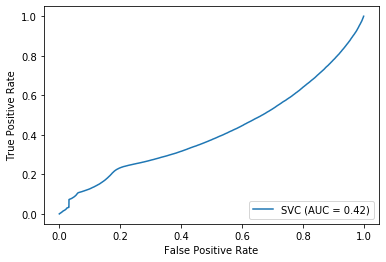

SVC score train:  0.27470311243826806
SVC score test:  0.6222064935847238


In [272]:
# ROC curve
metrics.plot_roc_curve(SVC_model, test_features, test_labels)
plt.show() 
print("SVC score train: ", SVC_model.score(train_features, train_labels))
print("SVC score test: ", SVC_model.score(test_features, test_labels))
# this allows us to see if there is any overfitting in out model (which is bad)
# We have to see how the train and test accuracy vary to see how efficient our model predicts

## 5. LOGISTIC REGRESSION

In [273]:
LR_model = pickle.load(open('LR_Model', 'rb'))

In [274]:
# confusion matrix: Logistic Regression
prediccion_LR = LR_model.predict(test_features)
print(confusion_matrix(test_labels, prediccion_LR))
print(classification_report(test_labels, prediccion_LR))

[[258179    155]
 [ 70722   2964]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    258334
           1       0.95      0.04      0.08     73686

    accuracy                           0.79    332020
   macro avg       0.87      0.52      0.48    332020
weighted avg       0.82      0.79      0.70    332020



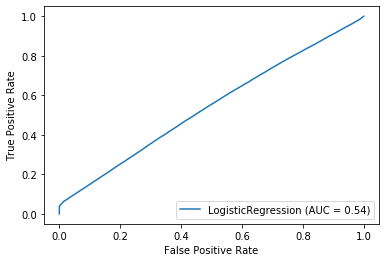

LR score train:  0.29090892385437006
LR score test:  0.786527920004819


In [275]:
# ROC curve
metrics.plot_roc_curve(LR_model, test_features, test_labels)
plt.show() 
print("LR score train: ", LR_model.score(train_features, train_labels))
print("LR score test: ", LR_model.score(test_features, test_labels))
# this allows us to see if there is any overfitting in out model (which is bad)
# We have to see how the train and test accuracy vary to see how efficient our model predicts

## 6. RANDOM FOREST

In [276]:
RF_model = pickle.load(open('RF_Model', 'rb'))

In [277]:
# Confusion matrix for Random Forest Model
prediccion_RF = RF_model.predict(test_features)
print(confusion_matrix(test_labels, prediccion_RF))
print(classification_report(test_labels, prediccion_RF))

[[     0 258334]
 [  2868  70818]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    258334
           1       0.22      0.96      0.35     73686

    accuracy                           0.21    332020
   macro avg       0.11      0.48      0.18    332020
weighted avg       0.05      0.21      0.08    332020



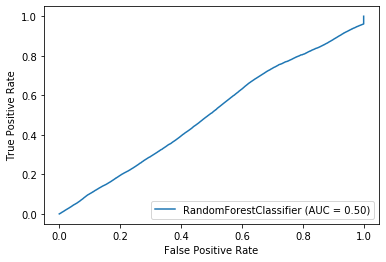

Random Forest score train:  0.31162053520156197
Random Forest score test:  0.21329437985663513


In [278]:
# ROC Curve
metrics.plot_roc_curve(RF_model, test_features, test_labels)
plt.show() 
print("Random Forest score train: ", RF_model.score(train_features, train_labels))
print("Random Forest score test: ", RF_model.score(test_features, test_labels))

## 7. XGBOOST

In [279]:
XGB_model = pickle.load(open('XGB_Model', 'rb'))

In [280]:
# XGBoost confusion matrix
prediccion_XGB = XGB_model.predict(test_features)
print(confusion_matrix(test_labels, prediccion_XGB))
print(classification_report(test_labels, prediccion_XGB))

[[    21 258313]
 [     2  73684]]
              precision    recall  f1-score   support

           0       0.91      0.00      0.00    258334
           1       0.22      1.00      0.36     73686

    accuracy                           0.22    332020
   macro avg       0.57      0.50      0.18    332020
weighted avg       0.76      0.22      0.08    332020



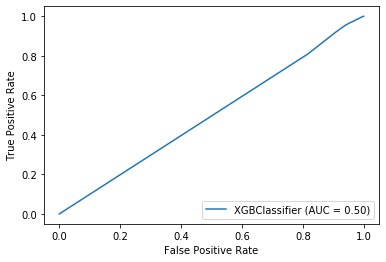

XGBoost score train:  0.2857305616170897
XGBoost score test:  0.22198963917836276


In [282]:
# ROC Curve
metrics.plot_roc_curve(XGB_model, test_features, test_labels)
plt.show() 

print("XGBoost score train: ", XGB_model.score(train_features, train_labels))
print("XGBoost score test: ", XGB_model.score(test_features, test_labels))

## 8. Final comparisons

### ROC Curve Comparisons

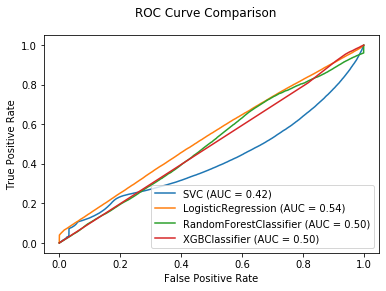

In [283]:
roc_SVC = plot_roc_curve(SVC_model, test_features, test_labels)
roc_RL = plot_roc_curve(LR_model, test_features, test_labels, ax = roc_SVC.ax_)
roc_RF = plot_roc_curve(RF_model, test_features, test_labels, ax = roc_RL.ax_)
roc_XGB = plot_roc_curve(XGB_model, test_features, test_labels, ax = roc_RF.ax_)
roc_XGB.figure_.suptitle("ROC Curve Comparison")

plt.show()

In [284]:
print('Support Vector Machine')
print(classification_report(test_labels, prediccion_SVC))
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(SVC_model.score(test_features, test_labels)))
print('')

print('Logistic Regression')
print(classification_report(test_labels, prediccion_LR))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(LR_model.score(test_features, test_labels)))
print('')

print('Random Forest')
print(classification_report(test_labels,prediccion_RF))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RF_model.score(test_features, test_labels)))
print('')

print('XGBoost')
print(classification_report(test_labels,prediccion_XGB))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(XGB_model.score(test_features, test_labels)))
print('')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    258334
           1       0.21      0.26      0.24     73686

    accuracy                           0.62    332020
   macro avg       0.49      0.49      0.49    332020
weighted avg       0.65      0.62      0.64    332020

Accuracy of Support Vector Machine classifier on test set: 0.62

Logistic Regression
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    258334
           1       0.95      0.04      0.08     73686

    accuracy                           0.79    332020
   macro avg       0.87      0.52      0.48    332020
weighted avg       0.82      0.79      0.70    332020

Accuracy of Logistic Regression classifier on test set: 0.79

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    258334
           1       0.22      0.96      0.35     73686

## 9. Conclusions

* The best model out of the four presented is the Random Forest model, providing us with an accuracy of 0.79 (when turning the values around) using the full test set.The area under the ROC Curve for our Random Forest Model is of 0.50, which is okay.
* In this model, the most relevant variables were funded_amnt, delinq_2yrs, tot_cur_bal, tot_acc and int_rate. This makes sense, especially the variables which represent the funded amount of the loan and the interest rate that the loan has. 
* Our accuracy decreased in comparison to our study with the full dataset and splitting the train and test sets ourselves, but all in all the results are still good (anything between 0.70-0.80 is a good result).

## 10. References

* __Bambrick, N.__ (Jul de 2016). Support Vector Machines: A Simple Explanation. Obtenido de KDnuggets News: https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html
* __Bodas, D.__ (2019). Apuntes Machine Learning MDS. Madrid: CUNEF.
* __Breiman, L.__ (January 2001). Random Forests. Berkeley: Statistics Department University of California.
* __Koehrsen, W.__ (27 de Dec de 2017). Random Forest in Python. Obtenido de Towards Data Science : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 
* __loan.csv. (s.f.).__ Lending Club Loan Data. Obtenido de kaggle: https://www.kaggle.com/wendykan/lending-club-loan-data
* __Seif, G.__ (29 de May de 2019). Towards Data Science . Obtenido de A Beginner’s guide to XGBoost: https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7